In [12]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [13]:
using CSV, DataFrames, PyPlot

In [14]:
data = CSV.read("library_w_selection_scores.csv", DataFrame)
dropmissing!(data)
filter!(x->isfinite(x.GAS1_virus_S), data)

Row,Column1,nt_seq,EK266_GAS1_p1_rep1a_plasmid,EK266_GAS1_p1_rep1b_plasmid,EK269_GAS1_p1_rep1a_plasmid_x,EK269_GAS1_p1_rep1b_plasmid_x,EK269_GAS1_p1_rep1c_plasmid_x,EK269_GAS1_p1_rep1d_plasmid_x,EK269_GAS1_v3_rep1a_virus_x,EK269_GAS1_v3_rep1b_virus_x,EK269_GAS1_v3_rep1c_virus_x,EK269_GAS1_v3_rep1d_virus_x,EK269_GAS1_v4_rep2a_virus_x,EK269_GAS1_v4_rep2b_virus_x,EK269_GAS1_v4_rep2c_virus_x,EK269_GAS1_v4_rep2d_virus_x,EK269_GAS1_v5_rep3a_virus_x,EK269_GAS1_v5_rep3b_virus_x,EK269_GAS1_v5_rep3c_virus,EK269_GAS1_v5_rep3d_virus,aa_x,category_x,chip_x,control_x,is_wt_aa_x,is_wt_nt_x,mask_x,mut_x,rep_i,rep_original_x,rep_total_x,EK269_GAS1_p1_rep1a_plasmid_y,EK269_GAS1_p1_rep1b_plasmid_y,EK269_GAS1_p1_rep1c_plasmid_y,EK269_GAS1_p1_rep1d_plasmid_y,EK269_GAS1_v3_rep1a_virus_y,EK269_GAS1_v3_rep1b_virus_y,EK269_GAS1_v3_rep1c_virus_y,EK269_GAS1_v3_rep1d_virus_y,EK269_GAS1_v4_rep2a_virus_y,EK269_GAS1_v4_rep2b_virus_y,EK269_GAS1_v4_rep2c_virus_y,EK269_GAS1_v4_rep2d_virus_y,EK269_GAS1_v5_rep3a_virus_y,EK269_GAS1_v5_rep3b_virus_y,aa_y,category_y,chip_y,control_y,is_wt_aa_y,is_wt_nt_y,mask_y,mut_y,rep_original_y,rep_total_y,GAS1_plasmid_N,GAS1_virus_N,GAS1_plasmid_F,GAS1_virus_F,GAS1_virus_S
,Int64,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,String,Int64,Int64,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,String,Int64,Int64,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,GACGAGGACGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGTATGGTTCTGTATCTACCAACCTCCAGGATAACGGCAACAACGATAGA,4,7,6,8,8,8,16,17,16,12,17,18,19,8,21,16,10,20,DEDEIRTTNPVATEQYGSVSTNLQDnGnNdR,rnn_designed_plus_rand_train_walked,1,0,0,0,__D_____________________Dn_n_d_,5,1,1,1,13,89,51,47,176,47,53,211,78,188,84,29,45,42,DEDEIRTTNPVATEQYGSVSTNLQDnGnNdR,rnn_designed_plus_rand_train_walked,1,0,0,0,__D_____________________Dn_n_d_,5,1,1,230,1143,3.47247e-6,5.1631e-6,0.572274
2,1,GACGAGGACGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGTATGGTGCGGTATCTACCAACCTCCAGGGCGACGGCAACGATAGA,23,11,11,12,13,13,36,47,34,50,41,51,25,20,27,36,42,47,DEDEIRTTNPVATEQYGAVSTNLQGdGNdR,rnn_designed_plus_rand_train_walked,1,0,0,0,__D______________A______Gd__d_,5,1,1,1,29,129,100,63,439,131,130,563,269,513,270,98,88,85,DEDEIRTTNPVATEQYGAVSTNLQGdGNdR,rnn_designed_plus_rand_train_walked,1,0,0,0,__D______________A______Gd__d_,5,1,1,370,3042,5.58615e-6,1.37412e-5,1.29858
3,2,GACGAAGAGGAAATCGCTACAACCAATCCCGTGGCTACGGAGCAGTATGGTTCTGTATCTACCAACCTCCAGCACGACGGCGATGAAAGA,10,16,12,9,14,11,14,12,8,12,44,53,36,42,13,14,18,20,DEEEIATTNPVATEQYGSVSTNLQHdGDeR,rnn_designed_plus_rand_train_walked,1,0,0,0,_____A__________________Hd_De_,5,1,1,1,27,121,91,65,171,66,50,176,356,648,338,128,46,42,DEEEIATTNPVATEQYGSVSTNLQHdGDeR,rnn_designed_plus_rand_train_walked,1,0,0,0,_____A__________________Hd_De_,5,1,1,350,2307,5.2842e-6,1.04211e-5,0.979746
4,3,GACGAACACGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGTATGGTAATGTATCTACCAACCTCCAGGGCGGAGGCGACAACAGA,27,20,12,11,37,32,76,64,63,50,88,89,86,52,73,81,87,91,DEHEIRTTNPVATEQYGNVSTNLQGgGdNR,rnn_designed_plus_rand_train_walked,1,0,0,0,__H______________N______Gg_d__,5,1,1,1,66,288,243,190,830,244,238,979,651,1158,588,185,241,229,DEHEIRTTNPVATEQYGNVSTNLQGgGdNR,rnn_designed_plus_rand_train_walked,1,0,0,0,__H______________N______Gg_d__,5,1,1,879,6243,1.32709e-5,2.82006e-5,1.08746
5,4,GACGAACATGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGTATGGTTCTGTATCTACCAACCTCCAGCCGGGGGGCAACGATGGT,19,14,15,17,10,10,50,59,22,29,63,65,77,57,18,26,37,24,DEHEIRTTNPVATEQYGSVSTNLQpGGNDg,rnn_designed_plus_rand_train_walked,1,0,0,0,__H_____________________pG__Dg,5,1,1,1,36,172,122,97,552,188,157,616,487,845,457,146,75,76,DEHEIRTTNPVATEQYGSVSTNLQpGGNDg,rnn_designed_plus_rand_train_walked,1,0,0,0,__H_____________________pG__Dg,5,1,1,479,4126,7.2318e-6,1.86378e-5,1.3658
6,5,GACGAACACGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGTATGGTTCTGTATCTACCAACCTCCAGCATAACGGAAACGAAAGA,20,15,10,6,14,5,53,5

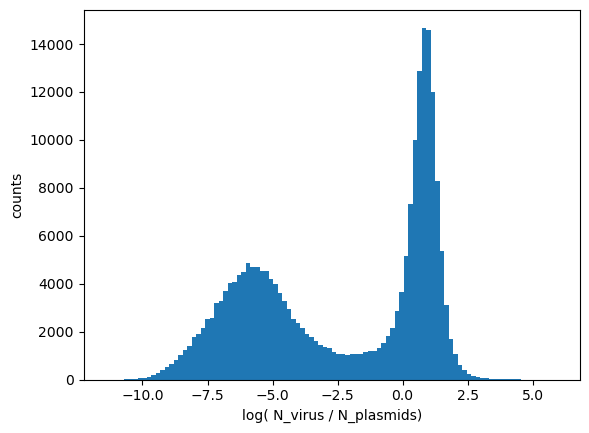

PyObject Text(24.0, 0.5, 'counts')

In [23]:
hist(data.GAS1_virus_S, bins=100);
xlabel("log( N_virus / N_plasmids)")
ylabel("counts")

In [17]:
labels = unique(data.category_x)

24-element Vector{String}:
 "rnn_designed_plus_rand_train_walked"
 "rnn_designed_plus_rand_train_seed"
 "rnn_rand_doubles_plus_singles_walked"
 "rnn_rand_doubles_plus_singles_seed"
 "rnn_standard_walked"
 "rnn_standard_seed"
 "cnn_designed_plus_rand_train_walked"
 "cnn_designed_plus_rand_train_seed"
 "cnn_rand_doubles_plus_single_walked"
 "cnn_rand_doubles_plus_single_seed"
 "cnn_standard_walked"
 "cnn_standard_seed"
 "lr_designed_plus_rand_train_walked"
 "lr_designed_plus_rand_train_seed"
 "lr_rand_doubles_plus_single_walked"
 "lr_rand_doubles_plus_single_seed"
 "lr_standard_walked"
 "lr_standard_seed"
 "previous_chip_viable"
 "previous_chip_nonviable"
 "stop"
 "singles"
 "wild_type"
 "random_doubles"

In [18]:
train_labels = labels[[19,20,22,23,24]]

5-element Vector{String}:
 "previous_chip_viable"
 "previous_chip_nonviable"
 "singles"
 "wild_type"
 "random_doubles"

In [19]:
println("MIN/MAX EDITS")
for tl in train_labels
    println(tl, ": ", extrema(filter(x->x.category_x == tl, data).mut_x))
end

MIN/MAX EDITS
previous_chip_viable: (1, 18)
previous_chip_nonviable: (1, 35)
singles: (1, 1)
wild_type: (0, 0)
random_doubles: (2, 2)


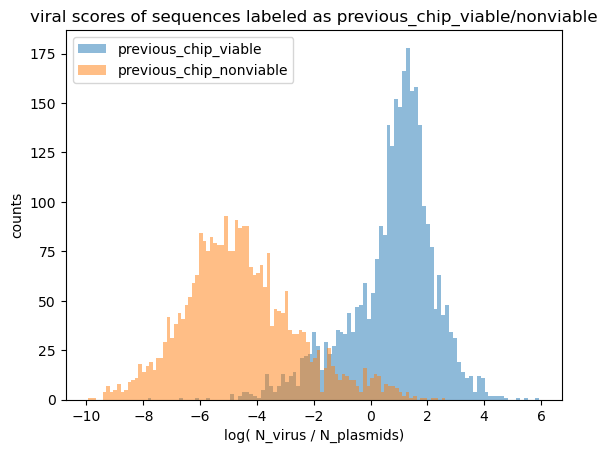

PyObject Text(0.5, 1.0, 'viral scores of sequences labeled as previous_chip_viable/nonviable')

In [26]:
hist(filter(x-> x.category_x == train_labels[1], data).GAS1_virus_S, bins=100, alpha=0.5)
hist(filter(x-> x.category_x == train_labels[2], data).GAS1_virus_S, bins=100, alpha=0.5)
legend(train_labels[1:2]);
xlabel("log( N_virus / N_plasmids)")
ylabel("counts")
title("viral scores of sequences labeled as previous_chip_viable/nonviable")

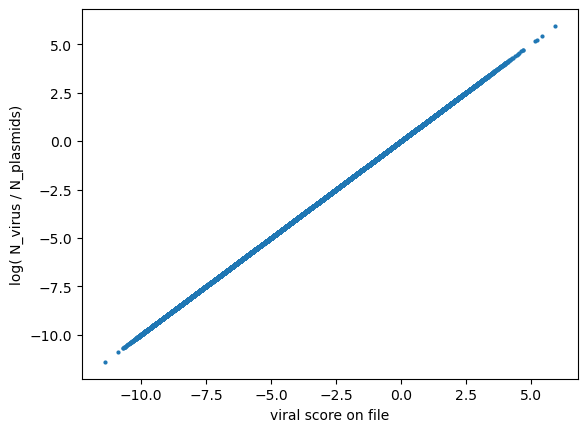

PyObject Text(24.140625, 0.5, 'log( N_virus / N_plasmids)')

In [25]:
θ = log2.(data.GAS1_virus_F ./ data.GAS1_plasmid_F)
scatter(data.GAS1_virus_S, θ, s=4)
extrema(abs.(θ .- data.GAS1_virus_S))
xlabel("viral score on file")
ylabel("log( N_virus / N_plasmids)")